In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [4]:
pd.set_option('display.max_columns',None)

## Lets load in our two datasets. One data set is the top trending videos in the united states and the other data set is the comments under the trending videos.

In [5]:
US_comments = pd.read_csv('UScomments.csv', error_bad_lines = False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [6]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
US_videos = pd.read_csv('USvideos.csv', error_bad_lines = False)

In [8]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration and wrangle

In [9]:
US_videos.shape

(7998, 21)

In [10]:
US_videos.nunique()

video_id          2335
title             2398
channel_title     1230
category_id         16
tags              2204
views             7944
likes             6627
dislikes          2532
comment_total     4153
thumbnail_link    2364
date                43
Unnamed: 11          3
Unnamed: 12          2
Unnamed: 13          2
Unnamed: 14          2
Unnamed: 15          2
Unnamed: 16          2
Unnamed: 17          2
Unnamed: 18          2
Unnamed: 19          2
Unnamed: 20          2
dtype: int64

In [11]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 21 columns):
video_id          7998 non-null object
title             7998 non-null object
channel_title     7998 non-null object
category_id       7998 non-null int64
tags              7998 non-null object
views             7998 non-null int64
likes             7998 non-null int64
dislikes          7998 non-null int64
comment_total     7998 non-null int64
thumbnail_link    7998 non-null object
date              7998 non-null object
Unnamed: 11       6 non-null object
Unnamed: 12       2 non-null object
Unnamed: 13       2 non-null float64
Unnamed: 14       2 non-null object
Unnamed: 15       2 non-null float64
Unnamed: 16       2 non-null float64
Unnamed: 17       2 non-null float64
Unnamed: 18       2 non-null float64
Unnamed: 19       2 non-null object
Unnamed: 20       2 non-null float64
dtypes: float64(6), int64(5), object(10)
memory usage: 1.3+ MB


In [12]:
US_comments.shape

(691400, 4)

In [13]:
US_comments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [14]:
US_comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [15]:
US_comments.dropna(inplace=True)

In [16]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [17]:
US_comments.shape

(691375, 4)

In [18]:
US_comments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [19]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
video_id        691375 non-null object
comment_text    691375 non-null object
likes           691375 non-null object
replies         691375 non-null object
dtypes: object(4)
memory usage: 26.4+ MB


In [20]:
US_comments.drop(41587, inplace=True)

In [21]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [22]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Time for sentiment analysis on US_comments data

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valazeinali/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [25]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [26]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000


## Classify the sentiment scores as either positive,
## negative, or neutral

In [27]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [28]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000,Neutral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000,Neutral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000,Neutral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648,Positive
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000,Neutral


In [29]:
US_comments.Sentiment.value_counts()

Positive    313651
Neutral     235961
Negative    141762
Name: Sentiment, dtype: int64

In [30]:
US_comments.video_id.nunique()

2266

## % of comments that are positive

In [31]:
US_comments[US_comments.video_id == US_comments.video_id.unique()[0]]['Sentiment'].value_counts()

Neutral     299
Positive    289
Negative    212
Name: Sentiment, dtype: int64

In [32]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Dataframe of the videos with their comments (Use the two data sets to match primary keys of video post/video comments.

In [33]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [34]:
Positivity.columns = ['video_id','Positive Percentage']

In [35]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,36.12
1,cLdxuaxaQwc,38.05
2,WYYvHb03Eog,35.12
3,sjlHnJvXdQs,41.50
4,cMKX2tE5Luk,43.00


## Name the video_id's with their Youtube channels

In [36]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique())

In [37]:
Positivity['Channel'] = channels

In [38]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,36.12,[Logan Paul Vlogs]
1,cLdxuaxaQwc,38.05,[PewDiePie]
2,WYYvHb03Eog,35.12,[The Verge]
3,sjlHnJvXdQs,41.50,[jacksfilms]
4,cMKX2tE5Luk,43.00,[A24]


## Below shows channels whose comments are marked all positive sentiment

In [39]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
132,f5F2whaRzqw,100.0,[Kerry Wong]
395,cviyIIvBlto,100.0,[Kerry Wong]
466,S-a8NVEUO4E,100.0,[E! Live from the Red Carpet]
601,wBjAmThxDpA,100.0,[Vertical Entertainment LA]
612,_zl2GV89_GM,100.0,[Cosmic Book News]
819,D6zUj1tKxiU,100.0,[Xposure 365 TV]
821,lJj66BCiZWQ,100.0,[Eric Blattberg]
972,BNRUV3TuExQ,100.0,[Fathom Events]
1317,zuKX0fPlo2Q,100.0,[Thomas Bikias]
1454,Ekc7lWx0468,100.0,[The Illusion contest]


## Below shows channels who comments were negative (The negative influence channels).

In [40]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
151,7Ag2oDIeLvo,0.0,[OsbornTramain]
347,EwujR1ARsog,0.0,[Ford Motor Company]
386,Y7tLoqNjkks,0.0,[RAW]
420,p7sooI96zPI,0.0,[Geezus66]
424,jLa9wZHiqxg,0.0,[Rad Universe]
468,Oz88_p125uM,0.0,[ViralVideoUK]
592,BfxOimRxXvU,0.0,[Andro Hack]
604,k8LF_FU2luY,0.0,[Bollinger Motors]
611,tbDr_zAcM5g,0.0,[Maharishi University of Management]
629,HpxsQ1_UAec,0.0,[Manto kay SO Afsanay]


## Saving files for further analysis and lookup database

In [41]:
max_positivity = pd.DataFrame(Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()])

In [42]:
min_positivity = pd.DataFrame(Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()])

In [43]:
min_positivity.to_csv("Worst_Channel_influence.csv") #these are the channels with the worst comments on their videos

In [44]:
max_positivity.to_csv("Best_Channel_influence.csv") #these are the channels with the best comments on their videos

In [45]:
all_channel_sentiment = pd.DataFrame(Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage']])

In [46]:
all_channel_sentiment.to_csv("All_Channel_Sentiment.csv")

# Lets explore our sentiment values with some data analysis!

In [47]:
sns.set_palette('husl')

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
import math

In [50]:
data = pd.read_csv('All_Channel_Sentiment_OG.csv')

In [51]:
data.head()

,ID,Positive_Percentage,Channel
0,XpVt6Z1Gjjo,36.12,Logan Paul Vlogs
1,cLdxuaxaQwc,38.05,PewDiePie
2,WYYvHb03Eog,35.12,The Verge
3,sjlHnJvXdQs,41.50,jacksfilms
4,cMKX2tE5Luk,43.00,A24


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 3 columns):
ID                     2266 non-null object
Positive_Percentage    2266 non-null float64
Channel                2266 non-null object
dtypes: float64(1), object(2)
memory usage: 53.2+ KB


In [53]:
data.describe()

,Positive_Percentage
count,2266.000000
mean,45.753305
std,15.352123
min,0.000000
25%,35.680000
50%,44.355000
75%,54.767500
max,100.000000


In [54]:
data["Positive_Percentage"].describe()

count    2266.000000
mean       45.753305
std        15.352123
min         0.000000
25%        35.680000
50%        44.355000
75%        54.767500
max       100.000000
Name: Positive_Percentage, dtype: float64

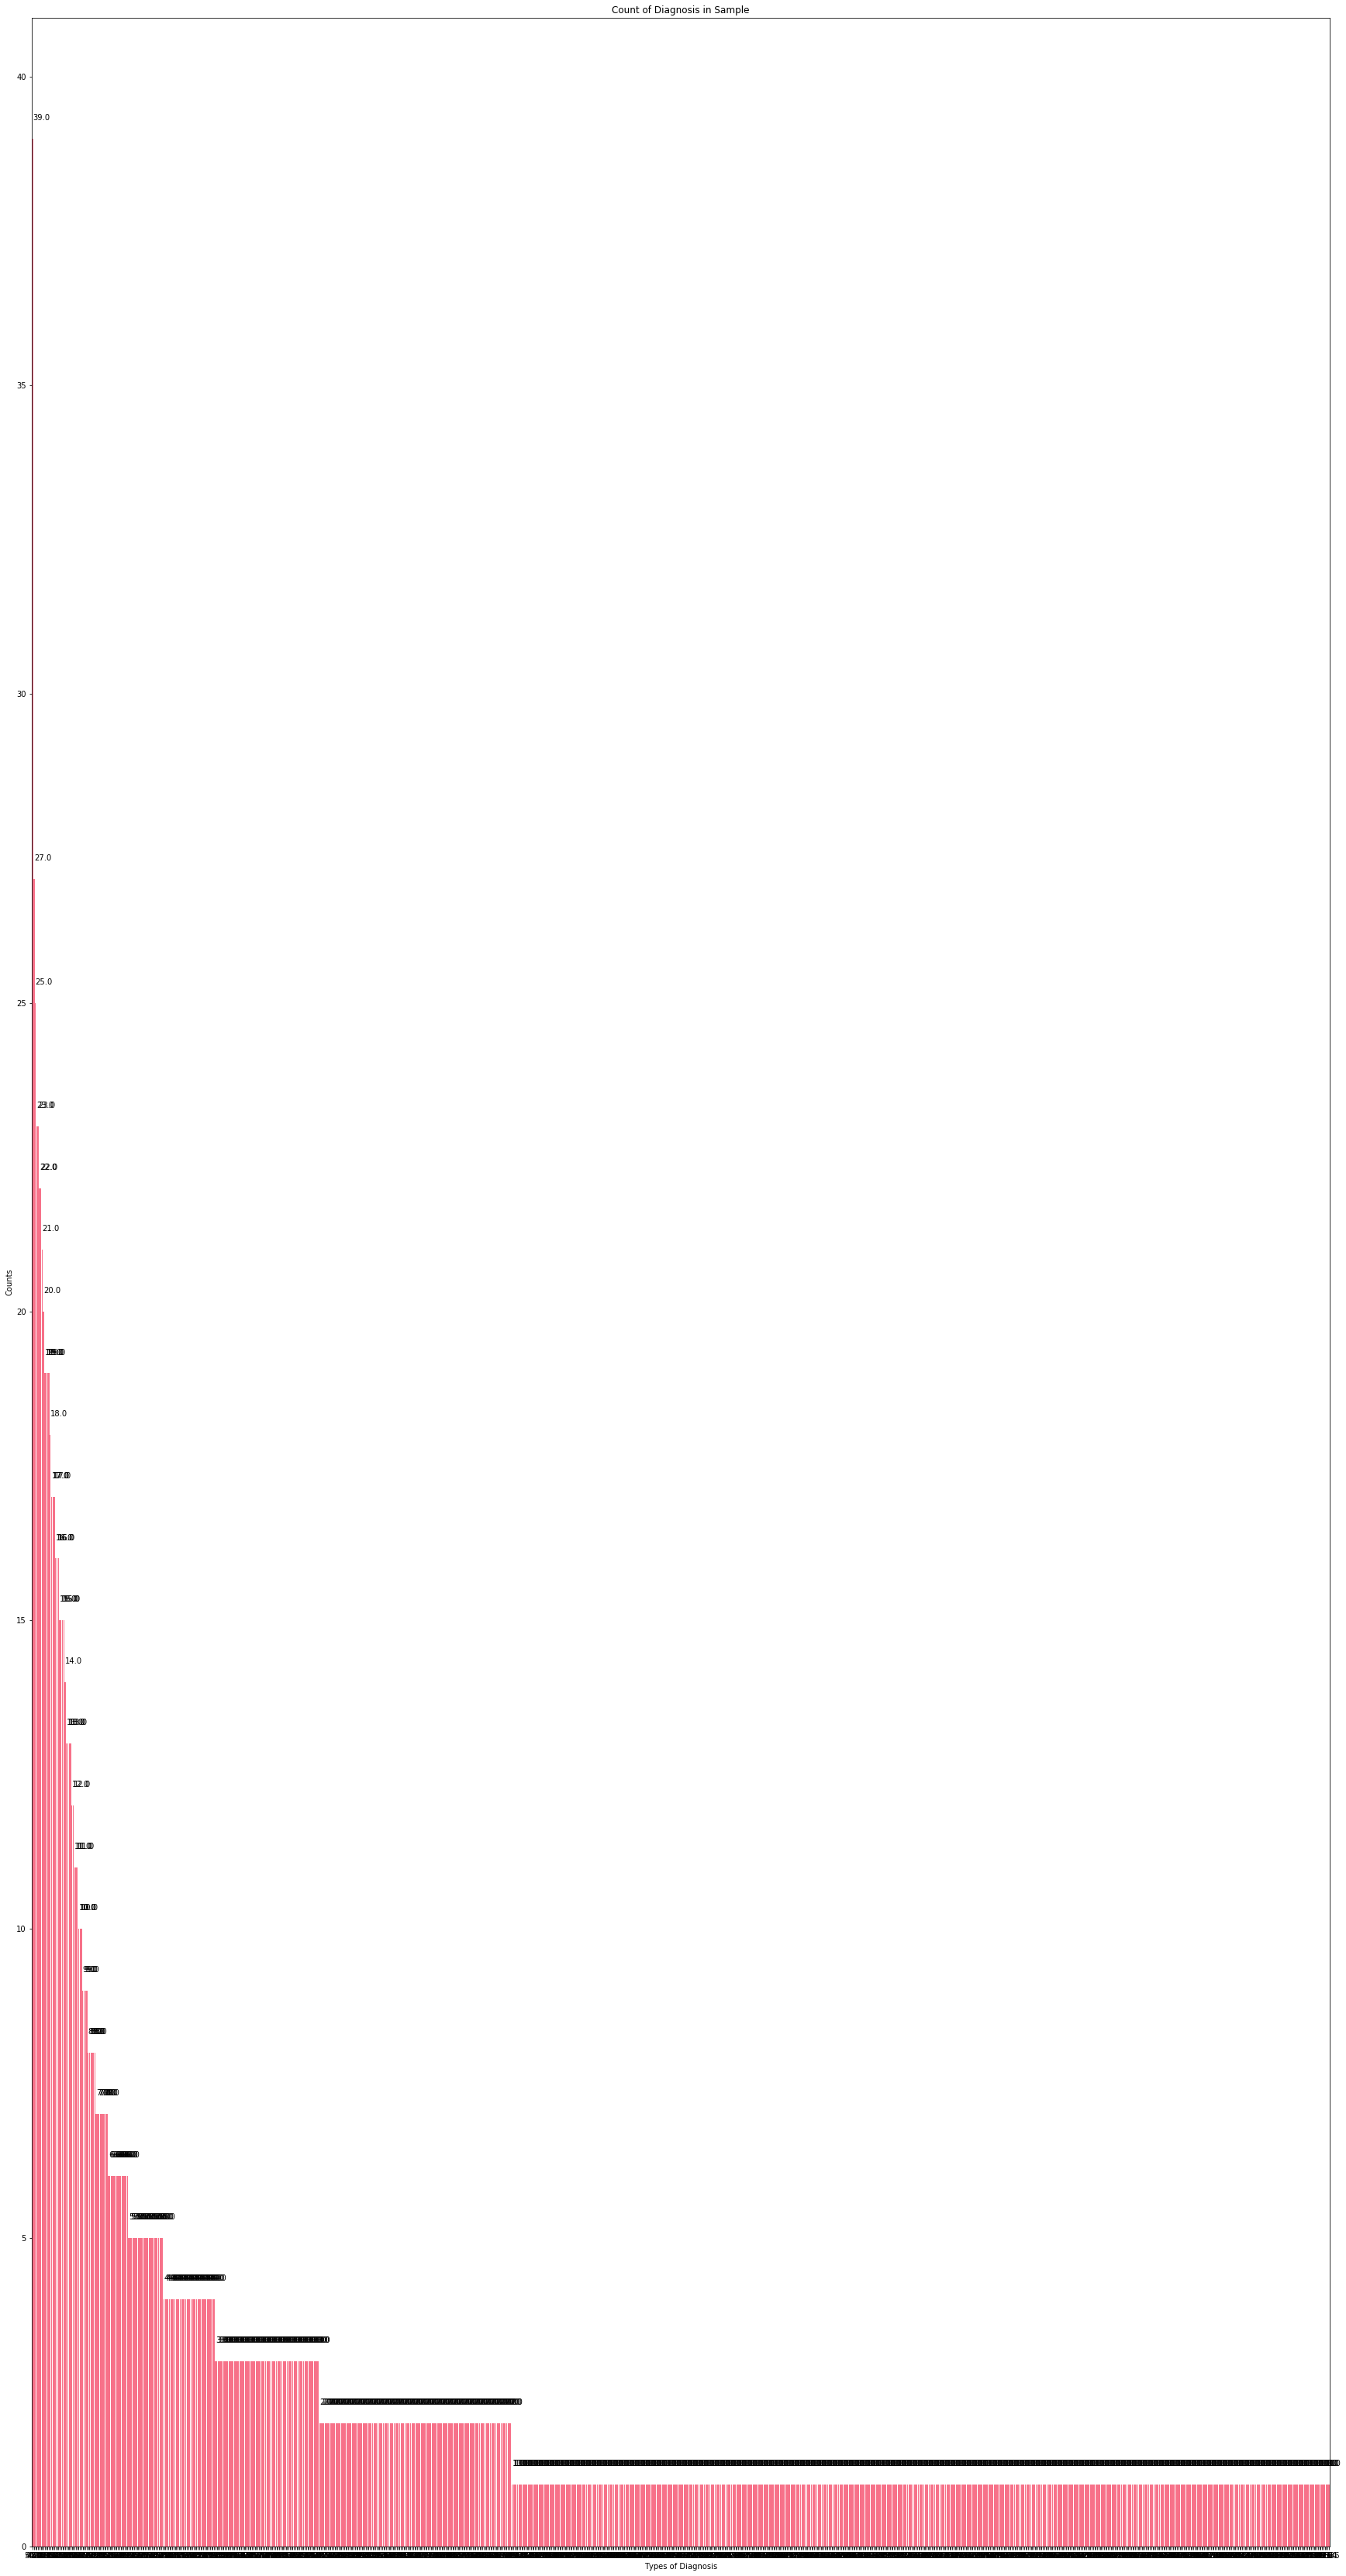

In [56]:
plt.figure(figsize = (30,60))
data["Positive_Percentage"].value_counts().plot(kind='bar') #Let us make a visual of the data 
#Add count over the bar
ax=data["Positive_Percentage"].value_counts().plot.bar(width=.8)
for i, v in data["Positive_Percentage"].value_counts().reset_index().iterrows():
   ax.text(i, v.Positive_Percentage + 0.3, v.Positive_Percentage, color='black')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Diagnosis')
plt.ylabel('Counts')
plt.title('Count of Diagnosis in Sample')
plt.show()

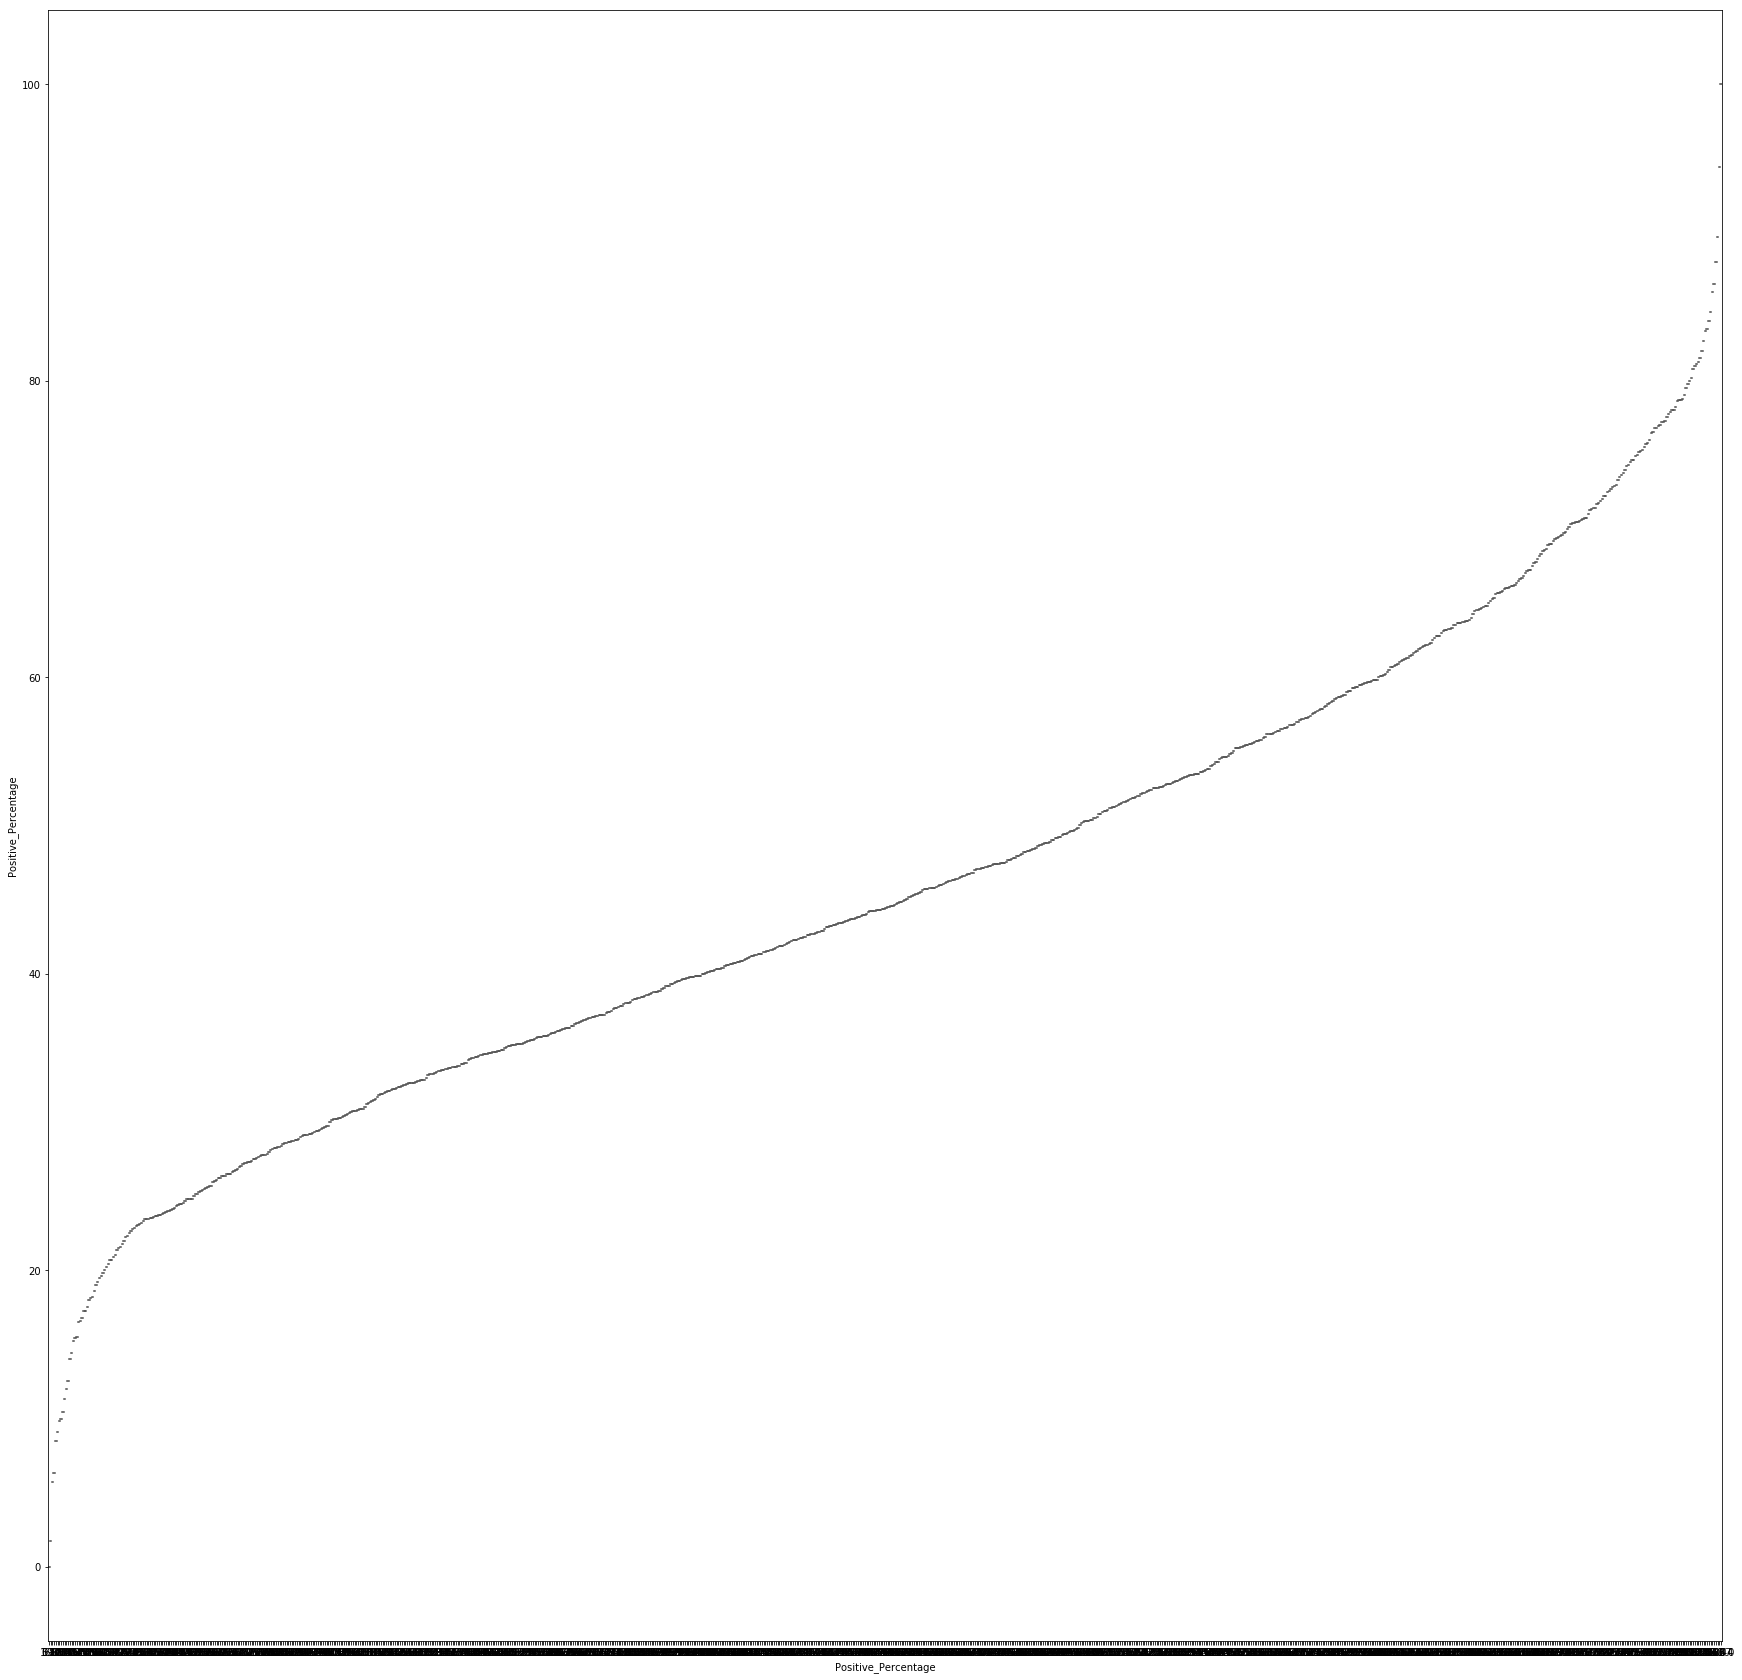

In [57]:
plt.figure(figsize = (30,30))
g = sns.violinplot(y='Positive_Percentage', x='Positive_Percentage', data=data, inner='quartile')
plt.show()

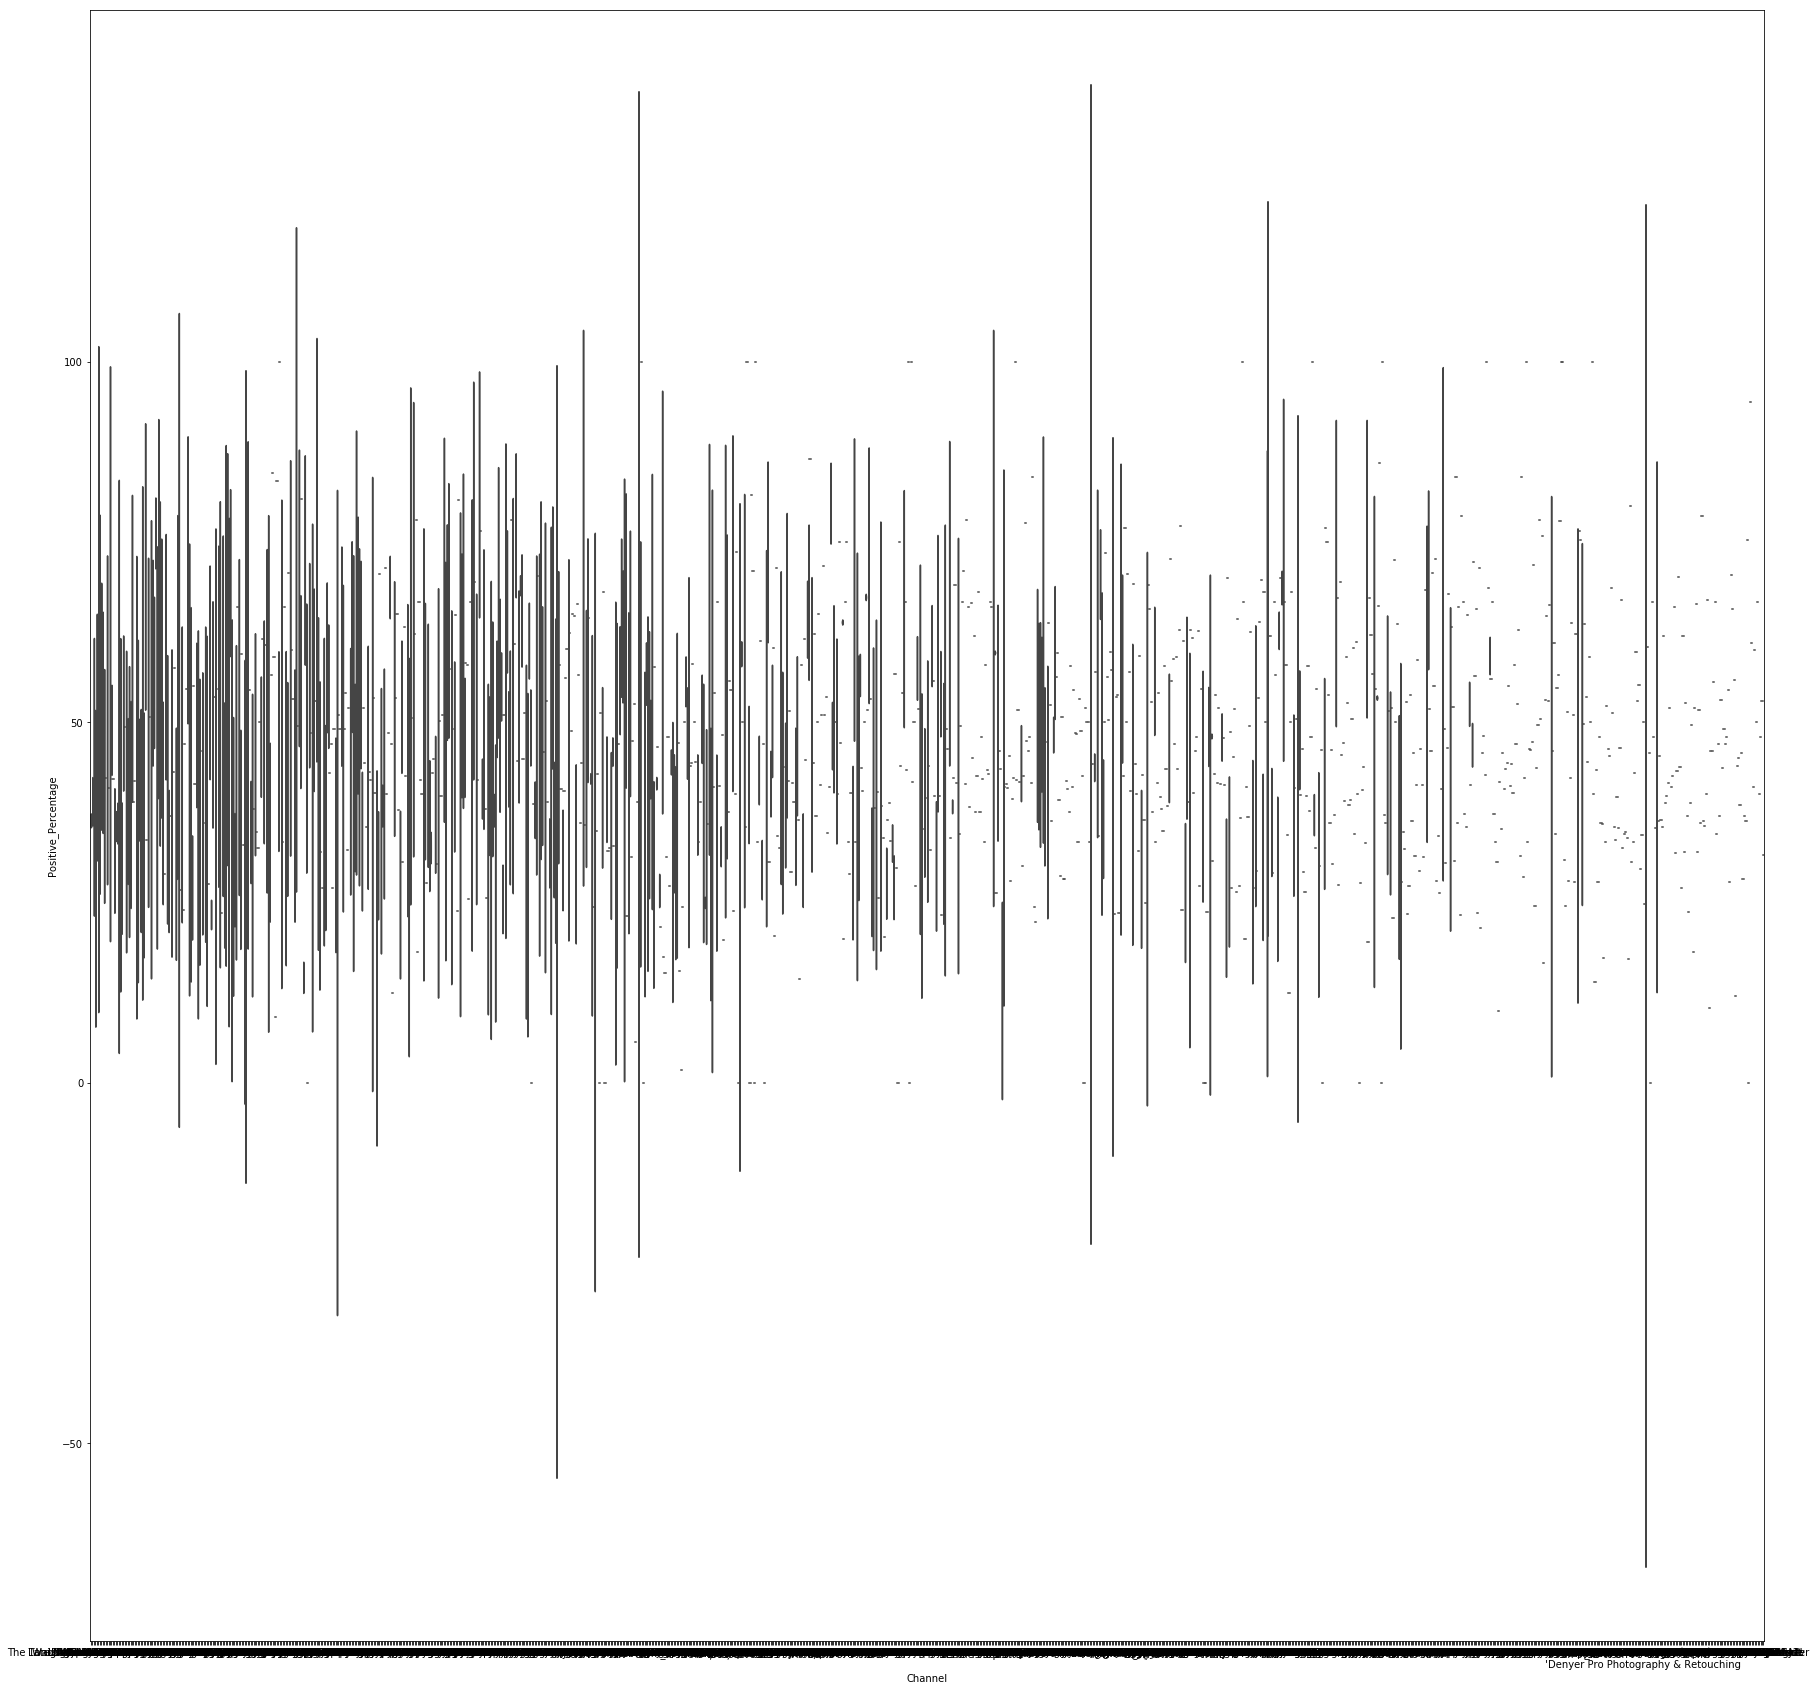

In [58]:
plt.figure(figsize = (30,30))
g = sns.violinplot(y='Positive_Percentage', x='Channel', data=data, inner='quartile')
plt.show()

In [59]:
data.head()

,ID,Positive_Percentage,Channel
0,XpVt6Z1Gjjo,36.12,Logan Paul Vlogs
1,cLdxuaxaQwc,38.05,PewDiePie
2,WYYvHb03Eog,35.12,The Verge
3,sjlHnJvXdQs,41.50,jacksfilms
4,cMKX2tE5Luk,43.00,A24


In [ ]:
data.info()